Anggota Kelompok:

- M Rifqi Wiliatama (1301184278)

- Aldiyan Farhan N  (1301180344)

- Andika Elang D    (1301184153)

Link Dataset:
https://drive.google.com/drive/folders/1AV42HGeyydxV7KIHzEGXV6dPDcqKaKAY

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Sesuaikan dengan directory zip
!unzip '/content/drive/MyDrive/UASViskom/Sohas_weapon-Detection_Fix_2.zip' -d ''

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: Sohas_weapon-Detection/images/knife_1204.jpg  
  inflating: Sohas_weapon-Detection/images/knife_1205.jpg  
  inflating: Sohas_weapon-Detection/images/knife_1206.jpg  
  inflating: Sohas_weapon-Detection/images/knife_1207.jpg  
  inflating: Sohas_weapon-Detection/images/knife_1208.jpg  
  inflating: Sohas_weapon-Detection/images/knife_121.jpg  
  inflating: Sohas_weapon-Detection/images/knife_1210.jpg  
  inflating: Sohas_weapon-Detection/images/knife_1211.jpg  
  inflating: Sohas_weapon-Detection/images/knife_1213.jpg  
  inflating: Sohas_weapon-Detection/images/knife_1216.jpg  
  inflating: Sohas_weapon-Detection/images/knife_1217.jpg  
  inflating: Sohas_weapon-Detection/images/knife_1219.jpg  
  inflating: Sohas_weapon-Detection/images/knife_122.jpg  
  inflating: Sohas_weapon-Detection/images/knife_1220.jpg  
  inflating: Sohas_weapon-Detection/images/knife_1221.jpg  
  inflating: Sohas_weapon-Detection/images/

Import library

In [ ]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from shutil import copyfile
from xml.dom.minidom import parse

Membuat Directory untuk gambar dan label

In [ ]:
!mkdir -p Dataset/labels
!mkdir -p Dataset/images

Mendefinisikan class

In [ ]:
classes = ['pistol', 'knife', 'smartphone', 'monedero', 'tarjeta', 'billete'] # monedero = purse, tarjeta = card, billete = bill

Fungsi untuk konversi PascalVOC ke YOLO

In [ ]:
def convert_annot(size, box):
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    
    return [x, y, w, h]

Fungsi untuk menyimpan anotasi YOLO kedalam file labels dengan format .txt

In [ ]:
def save_txt_file(img_jpg_file_name, size, img_box):
    save_file_name = '/content/Dataset/labels/' +  img_jpg_file_name + '.txt'
    print(save_file_name)
    
    with open(save_file_name ,'a+') as file_path:
        for box in img_box:
            cls_num = classes.index(box[0])
            new_box = convert_annot(size, box[1:])
            file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

        file_path.flush()
        file_path.close()

Fungsi untuk mengekstrak anotasi dari file xml (PascalVOC)

In [ ]:
def get_xml_data(file_path, img_xml_file):
    img_path = file_path + '/' + img_xml_file + '.xml'
    dom = parse(img_path)
    root = dom.documentElement
    img_name = root.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = root.getElementsByTagName("size")[0]
    objects = root.getElementsByTagName("object")
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data
   
    img_box = []
    for box in objects:
        cls_name = box.getElementsByTagName("name")[0].childNodes[0].data
        x1 = int(box.getElementsByTagName("xmin")[0].childNodes[0].data)
        y1 = int(box.getElementsByTagName("ymin")[0].childNodes[0].data)
        x2 = int(box.getElementsByTagName("xmax")[0].childNodes[0].data)
        y2 = int(box.getElementsByTagName("ymax")[0].childNodes[0].data)
        img_jpg_file_name = img_xml_file + '.jpg'
        img_box.append([cls_name, x1, y1, x2, y2])
  

    save_txt_file(img_xml_file, [img_w, img_h], img_box)

Mengkonversi semua anotasi PascalVCO kebentuk YOLO untuk data train

In [ ]:
files = os.listdir('Sohas_weapon-Detection/annotations/xmls')
for file in files:
    print("file name: ", file)
    file_xml = file.split(".")
    print(file_xml[0])
    get_xml_data('Sohas_weapon-Detection/annotations/xmls', file_xml[0])

Output streaming akan dipotong hingga 5000 baris terakhir.
billete_2067
/content/Dataset/labels/billete_2067.txt
file name:  monedero_1743.xml
monedero_1743
/content/Dataset/labels/monedero_1743.txt
file name:  smartphone_0060.xml
smartphone_0060
/content/Dataset/labels/smartphone_0060.txt
file name:  pistol_2941.xml
pistol_2941
/content/Dataset/labels/pistol_2941.txt
file name:  billete_0131.xml
billete_0131
/content/Dataset/labels/billete_0131.txt
file name:  knife_126.xml
knife_126
/content/Dataset/labels/knife_126.txt
file name:  MBmframe00286.xml
MBmframe00286
/content/Dataset/labels/MBmframe00286.txt
file name:  knife_1150.xml
knife_1150
/content/Dataset/labels/knife_1150.txt
file name:  smartphone_0065.xml
smartphone_0065
/content/Dataset/labels/smartphone_0065.txt
file name:  KravMagaTraining167.xml
KravMagaTraining167
/content/Dataset/labels/KravMagaTraining167.txt
file name:  monedero_1669.xml
monedero_1669
/content/Dataset/labels/monedero_1669.txt
file name:  smartphone_0071

Mengkonversi semua anotasi PascalVCO kebentuk YOLO untuk data validasi

In [ ]:
files = os.listdir('Sohas_weapon-Detection/annotations_test/xmls')
for file in files:
    print("file name: ", file)
    file_xml = file.split(".")
    print(file_xml[0])
    get_xml_data('Sohas_weapon-Detection/annotations_test/xmls', file_xml[0])

file name:  smartphone_1004.xml
smartphone_1004
/content/Dataset/labels/smartphone_1004.txt
file name:  MBmframe00316.xml
MBmframe00316
/content/Dataset/labels/MBmframe00316.txt
file name:  smartphone_z3v7_05.xml
smartphone_z3v7_05
/content/Dataset/labels/smartphone_z3v7_05.txt
file name:  img2105.xml
img2105
/content/Dataset/labels/img2105.txt
file name:  knife_271.xml
knife_271
/content/Dataset/labels/knife_271.txt
file name:  knife_33.xml
knife_33
/content/Dataset/labels/knife_33.txt
file name:  knife_863.xml
knife_863
/content/Dataset/labels/knife_863.txt
file name:  pistol_9010.xml
pistol_9010
/content/Dataset/labels/pistol_9010.txt
file name:  pistol_5041.xml
pistol_5041
/content/Dataset/labels/pistol_5041.txt
file name:  knife_907.xml
knife_907
/content/Dataset/labels/knife_907.txt
file name:  knife_135.xml
knife_135
/content/Dataset/labels/knife_135.txt
file name:  ABsframe00208.xml
ABsframe00208
/content/Dataset/labels/ABsframe00208.txt
file name:  ABmframe00346.xml
ABmframe00

Memasukkan data citra kedalam list train dan test

In [ ]:
# from sklearn.model_selection import train_test_split
image_list_train = os.listdir('/content/Sohas_weapon-Detection/images')
image_list_test = os.listdir('/content/Sohas_weapon-Detection/images_test')
train_list = image_list_train
test_list = image_list_test
print('total =',len(train_list + image_list_test))
print('train :',len(train_list))
print('test  :',len(test_list))

total = 5859
train : 5002
test  : 857


Fungsi untuk mencopy data gambar dan label ke file nya masing-masing (train/test)

In [ ]:
def copy_data(file_list, img_labels_root, imgs_source, mode):

    root_file = Path( '/content/Dataset/images/'+  mode)
    if not root_file.exists():
        print(f"Path {root_file} does not exit, making a new one")
        os.makedirs(root_file)

    root_file = Path('/content/Dataset/labels/' + mode)
    if not root_file.exists():
        print(f"Path {root_file} does not exit, making a new one")
        os.makedirs(root_file)

    for file in file_list:               
        img_name = file.replace('.jpg', '')        
        img_src_file = imgs_source + '/' + img_name + '.jpg'        
        label_src_file = img_labels_root + '/' + img_name + '.txt'

        DICT_DIR = '/content/Dataset/images/'  + mode
        img_dict_file = DICT_DIR + '/' + img_name + '.jpg'
        copyfile(img_src_file, img_dict_file)

        DICT_DIR = '/content/Dataset/labels/' + mode
        img_dict_file = DICT_DIR + '/' + img_name + '.txt'
        copyfile(label_src_file, img_dict_file)

Mengcopy data gambar dan label ke file masing-masing (train/test)

In [ ]:
copy_data(train_list, '/content/Dataset/labels', '/content/Sohas_weapon-Detection/images', "train")
copy_data(test_list,  '/content/Dataset/labels', '/content/Sohas_weapon-Detection/images_test', "test")

Path /content/Dataset/images/train does not exit, making a new one
Path /content/Dataset/labels/train does not exit, making a new one
Path /content/Dataset/images/test does not exit, making a new one
Path /content/Dataset/labels/test does not exit, making a new one


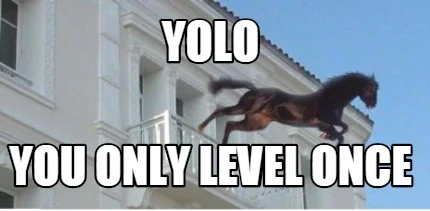

Mengekstrak data untuk dilakukan deteksi

In [ ]:
!unzip '/content/drive/MyDrive/UASViskom/PotoTestBaru.zip' -d ''

Archive:  /content/drive/MyDrive/UASViskom/PotoTestBaru.zip
  inflating: ASW/20220627_190256.jpg  
  inflating: ASW/20220627_190316.jpg  
  inflating: ASW/20220627_190317.jpg  


In [ ]:
!unzip '/content/drive/MyDrive/UASViskom/PotoTest.zip' -d ''

Archive:  /content/drive/MyDrive/UASViskom/PotoTest.zip
   creating: PotoTest/
  inflating: PotoTest/unknown.png    
  inflating: PotoTest/unknown1.png   
  inflating: PotoTest/unknown2.png   
  inflating: PotoTest/unknown3.png   
  inflating: PotoTest/unknown4.png   
  inflating: PotoTest/unknown5.png   
  inflating: PotoTest/unknown6.png   


Melakukan clone repository YOLOv5 dari github

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12321, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 12321 (delta 19), reused 11 (delta 5), pack-reused 12281
Receiving objects: 100% (12321/12321), 12.08 MiB | 4.09 MiB/s, done.
Resolving deltas: 100% (8494/8494), done.
/content/yolov5


Membuat file yaml untuk konfigurasi YOLO

In [ ]:
import yaml

dict_file = {'train':'/content/Dataset/images/train',
            'val': '/content/Dataset/images/test',
            'nc' : '6',
            'names' : ['pistol', 'knife', 'smartphone', 'monedero', 'tarjeta', 'billete']}

with open('/content/yolov5/data/od_weapon.yaml', 'w+') as file:
    documents = yaml.dump(dict_file, file)

Melakukan instalasi requirements untuk penggunaan YOLOv5

In [ ]:
pip install -r requirements.txt  # install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 14.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!python train.py --img 416 --batch 32 --epochs 30 --data data/od_weapon.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=data/od_weapon.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-266-g34df503 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_

In [ ]:
!python val.py --weights runs/train/exp/weights/best.pt --data data/od_weapon.yaml --img 640

val: data=data/od_weapon.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-266-g34df503 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7026307 parameters, 0 gradients
val: Scanning '/content/Dataset/labels/test.cache' images and labels... 857 found, 0 missing, 0 empty, 0 corrupt: 100% 857/857 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 27/27 [00:24<00:00,  1.12it/s]
                 all        857        899      0.879      0.842      0.905      0.673
              pistol        857         85      0.925      0.953      0.971      0.724
               knife        857

In [ ]:
!python detect.py --source /content/PotoTest --weights runs/train/exp/weights/best.pt --conf 0.25

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/PotoTest, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-266-g34df503 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7026307 parameters, 0 gradients
image 1/7 /content/PotoTest/unknown.png: 384x640 1 pistol, 1 smartphone, Done. (0.011s)
image 2/7 /content/PotoTest/unknown1.png: 384x640 1 pistol, Done. (0.009s)
image 3/7 /content/PotoTest/unknown2.png: 384x640 1 pistol, 1 smartphone, Done. (0.008s)
image 4/7 /content/PotoTest/unknown3.png: 384x640 Done. (0.008s)
image 5/7 /content/PotoTest/unknown4.png: 38

In [ ]:
from IPython.display import Image

<function matplotlib.pyplot.show>

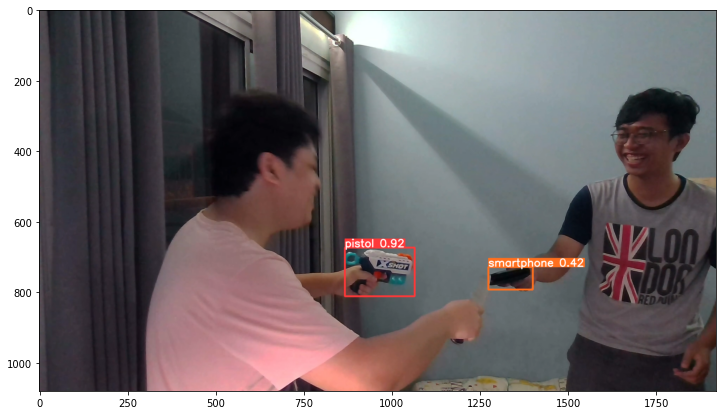

In [ ]:
from glob import glob
import matplotlib.pyplot as plt
testfiles = glob('runs/detect/exp2/*')
img = plt.imread(testfiles[6])
plt.figure(figsize=(15,7))
plt.imshow(img)
# plt.savefig('detect_1.png')
plt.show

LOCAL RUNNING

In [ ]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from shutil import copyfile
from xml.dom.minidom import parse

In [ ]:
classes = ['pistol', 'knife', 'smartphone', 'monedero', 'tarjeta', 'billete'] # monedero = purse, tarjeta = card, billete = bill

In [ ]:
def convert_annot(size, box):
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    
    return [x, y, w, h]

In [ ]:
def save_txt_file(img_jpg_file_name, size, img_box):
    save_file_name = r'C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\label/' +  img_jpg_file_name + '.txt'
    print(save_file_name)
    
    with open(save_file_name ,'a+') as file_path:
        for box in img_box:
            cls_num = classes.index(box[0])
            new_box = convert_annot(size, box[1:])
            file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

        file_path.flush()
        file_path.close()

In [ ]:
def get_xml_data(file_path, img_xml_file):
    img_path = file_path + '/' + img_xml_file + '.xml'
    dom = parse(img_path)
    root = dom.documentElement
    img_name = root.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = root.getElementsByTagName("size")[0]
    objects = root.getElementsByTagName("object")
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data
   
    img_box = []
    for box in objects:
        cls_name = box.getElementsByTagName("name")[0].childNodes[0].data
        x1 = int(box.getElementsByTagName("xmin")[0].childNodes[0].data)
        y1 = int(box.getElementsByTagName("ymin")[0].childNodes[0].data)
        x2 = int(box.getElementsByTagName("xmax")[0].childNodes[0].data)
        y2 = int(box.getElementsByTagName("ymax")[0].childNodes[0].data)
        img_jpg_file_name = img_xml_file + '.jpg'
        img_box.append([cls_name, x1, y1, x2, y2])
  

    save_txt_file(img_xml_file, [img_w, img_h], img_box)

In [ ]:
files = os.listdir(r'C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\annotations\xmls/')
for file in files:
    print("file name: ", file)
    file_xml = file.split(".")
    print(file_xml[0])
    get_xml_data(r'C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\annotations\xmls/', file_xml[0])

Streaming output truncated to the last 5000 lines.
pistol_1862
C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\label/pistol_1862.txt
file name:  pistol_1863.xml
pistol_1863
C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\label/pistol_1863.txt
file name:  pistol_1864.xml
pistol_1864
C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\label/pistol_1864.txt
file name:  pistol_1870.xml
pistol_1870
C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\label/pistol_1870.txt
file name:  pistol_1872.xml
pistol_1872
C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\label/pistol_1872.txt
file name:  pistol_1873.xml
pistol_1873
C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\label/pistol_1873.txt
file name:  pistol_1875.xml
pistol_1875
C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\label/pistol_1875.txt
file name:  pistol_1879.xml
pistol_1879
C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\label/pistol_1879.txt
file name:  pistol_1880.xml
pistol_1880
C:\KULIAH\Visi Komputer\UAS\Sohas

In [ ]:
from sklearn.model_selection import train_test_split
image_list = os.listdir(r'C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\images/')
train_list, test_list = train_test_split(image_list, test_size=0.2, random_state=42)
val_list, test_list = train_test_split(test_list, test_size=0.5, random_state=42)
print('total =',len(image_list))
print('train :',len(train_list))
print('val   :',len(val_list))
print('test  :',len(test_list))

total = 5002
train : 4001
val   : 500
test  : 501


In [ ]:
type(image_list[0])

str

In [ ]:
def copy_data(file_list, img_labels_root, imgs_source, mode):

    root_file = Path(r'C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\Dataset\image/'+  mode)
    if not root_file.exists():
        print(f"Path {root_file} does not exit, making a new one")
        os.makedirs(root_file)

    root_file = Path(r'C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\Dataset\label/' + mode)
    if not root_file.exists():
        print(f"Path {root_file} does not exit, making a new one")
        os.makedirs(root_file)

    for file in file_list:               
        img_name = file.replace('.jpg', '')        
        img_src_file = imgs_source + '/' + img_name + '.jpg'        
        label_src_file = img_labels_root + '/' + img_name + '.txt'

        DICT_DIR = r'C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\Dataset\image/'  + mode
        img_dict_file = DICT_DIR + '/' + img_name + '.jpg'
        copyfile(img_src_file, img_dict_file)

        DICT_DIR = r'C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\Dataset\label/' + mode
        img_dict_file = DICT_DIR + '/' + img_name + '.txt'
        copyfile(label_src_file, img_dict_file)

In [ ]:
copy_data(train_list, r'C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\label/', r'C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\images/', "train")
copy_data(val_list,   r'C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\label/', r'C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\images/', "val")
copy_data(test_list,  r'C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\label/', r'C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\images/', "test")

In [ ]:
!git clone https://github.com/ultralytics/yolov5/
%cd C:\Users\Aldiyan Farhan N\yolov5

C:\Users\Aldiyan Farhan N\yolov5


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
import yaml

dict_file = {'train':r'C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\Dataset\image\train/',
            'val': r'C:\KULIAH\Visi Komputer\UAS\Sohas_weapon-Detection\Dataset\image\val/',
            'nc' : '6',
            'names' : ['pistol', 'knife', 'smartphone', 'monedero', 'tarjeta', 'billete']}

with open(r'C:\Users\Aldiyan Farhan N\yolov5\data\hard_head.yaml', 'w+') as file:
    documents = yaml.dump(dict_file, file)

In [ ]:
!pip install -r requirements.txt

In [ ]:
!python train.py --img 416 --batch 32 --epochs 30 --data data/hard_head.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=data/hard_head.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   8abf796..455a072  update/README_cn -> origin/update/README_cn
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\Aldiyan': No such file or directory
YOLOv5  2022-6-26 Python-3.9.7 torch-1.11.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_